In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import t, describe

In [19]:
# Параметры задания
n = 100  # Размер выборки
q = 1.4  # Коэффициент для расчета вероятности
degrees_of_freedom = 8  # Степени свободы для t-распределения
k = 6

In [20]:
# 1 Генерация выборки из t-распределения
sample = np.random.standard_t(degrees_of_freedom, size=n)
print("Выборка: ", sample)

Выборка:  [ 0.03486011 -0.49512152 -1.91099219 -1.09906724 -0.24437781 -1.25857776
  0.20034994 -0.57718737 -1.14763524 -3.06871404 -0.89384404  0.0938929
 -0.76900943  2.25076758 -0.79218655 -0.03556139  1.8560286  -0.18140187
  0.07821801 -0.59374026  0.28271939 -1.24964188  0.10344881 -0.21924352
  0.39955195  0.15164556  1.30604179  0.30520109  0.3187356   0.33009786
 -0.49538143 -1.8607931  -0.46493426 -1.1378663   0.11645484 -0.54820667
 -1.17919752  1.67540744  0.34715658  1.47573711  0.06581458  0.15982883
  1.12697091 -1.2453121   1.43705508 -0.7419671  -0.68023653 -0.96713613
 -2.02196283 -0.27072872  0.15914212 -1.1609812   2.77248321 -0.53068782
 -2.07534274  0.82431735  0.93980943  0.50680017  1.0734365   0.29899359
 -0.31501918  1.0560614   1.92787058  1.46708912  1.08482986  3.51830608
 -0.62400796 -0.93472501 -0.2298398  -3.17639222 -1.08291149  2.17262714
  1.18128037 -0.91518995  0.88742155  1.76088684 -0.77284962  1.35894031
 -0.68227138  0.94727487  1.34717041  0.01

In [21]:
# 1.1 Интервальный ряд абсолютных частот
count, bins_edges = np.histogram(sample, bins="sturges")
print("Абсолютные частоты:", count)
print("Границы интервалов:", bins_edges)
print("Сумма абсолютных частот:", sum(count))

Абсолютные частоты: [ 2  5 22 30 18 17  4  2]
Границы интервалов: [-3.17639222 -2.33955494 -1.50271765 -0.66588036  0.17095693  1.00779421
  1.8446315   2.68146879  3.51830608]
Сумма абсолютных частот: 100


In [22]:
# 1.2 Интервальный ряд относительных частот
count_rel, bins_edges_rel = np.histogram(sample, bins="sturges", density=True)
interval_width = bins_edges_rel[1] - bins_edges_rel[0]
print("Относительные частоты:", count_rel)
print("Сумма относительных частот:", sum(count_rel * interval_width))
print("Длина интервала абсолютных частот:", interval_width)

Относительные частоты: [0.02389951 0.05974877 0.2628946  0.35849263 0.21509558 0.20314582
 0.04779902 0.02389951]
Сумма относительных частот: 1.0000000000000002
Длина интервала абсолютных частот: 0.8368372874234087


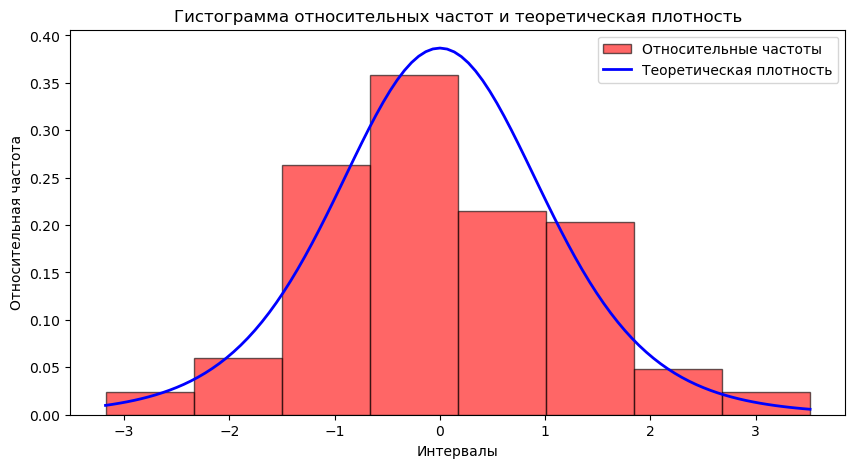

In [23]:
# 2.1 Гистограмма относительных частот и теоретическая плотность
plt.figure(figsize=(10, 5))
plt.hist(sample, bins="sturges", density=True, color="red", edgecolor="black", alpha=0.6, label="Относительные частоты")
x_vals = np.linspace(min(bins_edges), max(bins_edges), 100)
y_vals = t.pdf(x_vals, degrees_of_freedom)
plt.plot(x_vals, y_vals, color="blue", linewidth=2, label="Теоретическая плотность")
plt.title("Гистограмма относительных частот и теоретическая плотность")
plt.xlabel("Интервалы")
plt.ylabel("Относительная частота")
plt.legend()
plt.show()

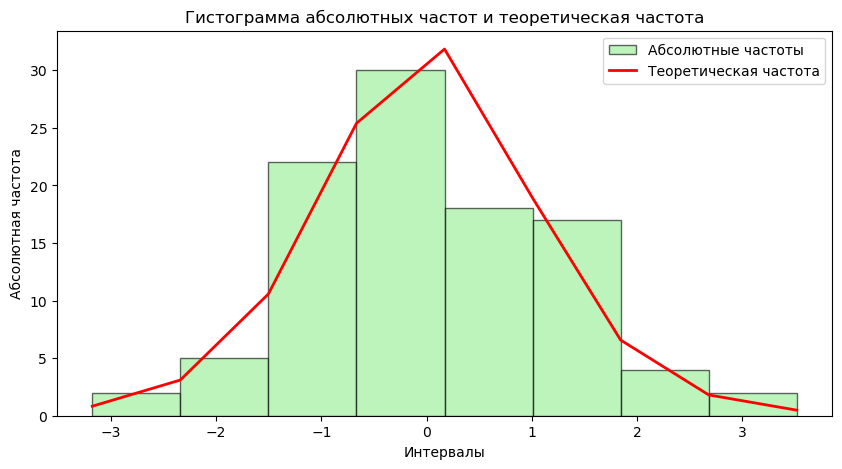

In [24]:
# 2.2 Гистограмма абсолютных частот и теоретическая частота
plt.figure(figsize=(10, 5))
plt.hist(sample, bins="sturges", color="lightgreen", edgecolor="black", alpha=0.6, label="Абсолютные частоты")
avs = t.pdf(bins_edges, degrees_of_freedom) * n * interval_width
plt.plot(bins_edges, avs, color="red", linewidth=2, label="Теоретическая частота")
plt.title("Гистограмма абсолютных частот и теоретическая частота")
plt.xlabel("Интервалы")
plt.ylabel("Абсолютная частота")
plt.legend()
plt.show()

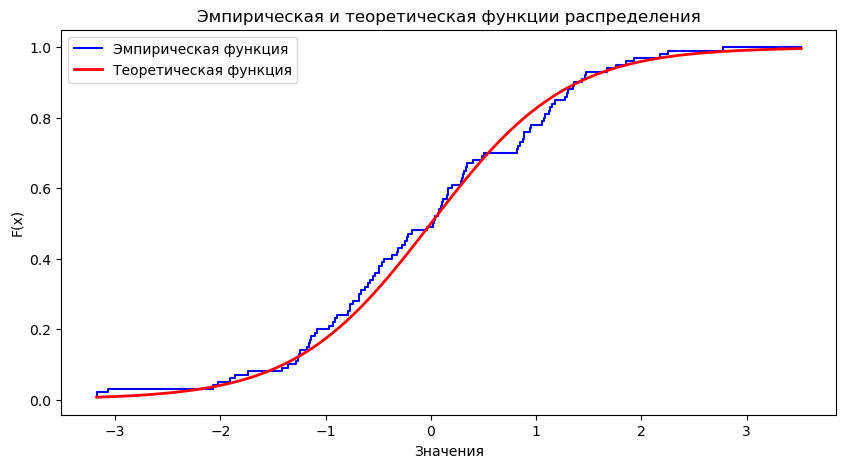

In [38]:

# 2.3 Эмпирическая и теоретическая функции распределения
plt.figure(figsize=(10, 5))
sorted_sample = np.sort(sample)
empirical_cdf = np.arange(1, n+1) / n
plt.step(sorted_sample, empirical_cdf, color="blue", label="Эмпирическая функция")
plt.plot(x_vals, t.cdf(x_vals, degrees_of_freedom), color="red", linewidth=2, label="Теоретическая функция")
plt.title("Эмпирическая и теоретическая функции распределения")
plt.xlabel("Значения")
plt.ylabel("F(x)")
plt.legend()
plt.show() #

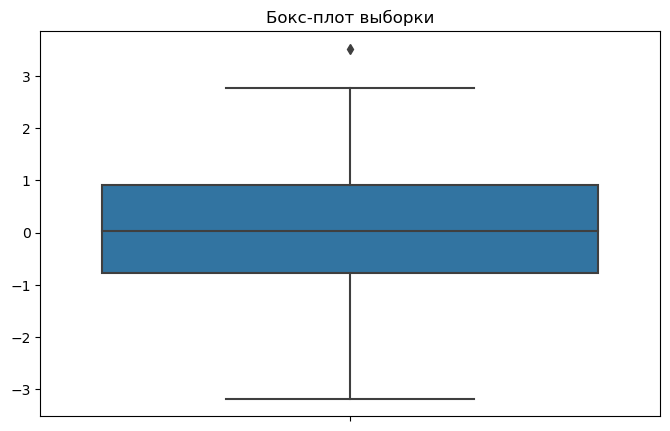

In [26]:
# 2.4 Бокс-плот выборки
plt.figure(figsize=(8, 5))
sb.boxplot(y=sample)
plt.title("Бокс-плот выборки")
plt.show()

In [27]:
iqr = np.percentile(sample, 75) - np.percentile(sample, 25)
lower_bound = np.percentile(sample, 25) - 1.5 * iqr
upper_bound = np.percentile(sample, 75) + 1.5 * iqr
theoretical_outliers = sum((sample < lower_bound) | (sample > upper_bound))
print("Число выбросов:", theoretical_outliers)
print("Теоретическое число выбросов ПРИ НОРМАЛЬНОМ РАСПРЕДЕЛЕНИИ ", 0.05*n)

Число выбросов: 1
Теоретическое число выбросов ПРИ НОРМАЛЬНОМ РАСПРЕДЕЛЕНИИ  5.0


In [28]:
# 3. Ответы на вопросы
interval_start = bins_edges[k-1]
interval_end = bins_edges[k]

# Оценка вероятности попадания в k-й интервал
probability_in_kth_interval = (count[k-1] * (interval_end - interval_start))
print(f"Оценка вероятности попадания значений в {k}-й интервал: {probability_in_kth_interval}")

theoretical_probability_in_kth_interval = t.cdf(interval_end, degrees_of_freedom) - t.cdf(interval_start, degrees_of_freedom)
print(f"Теоретическая вероятность попадания значений в {k}-й интервал: {theoretical_probability_in_kth_interval}")


Оценка вероятности попадания значений в 6-й интервал: 14.226233886197932
Теоретическая вероятность попадания значений в 6-й интервал: 0.1203716509876388


In [29]:
# 4. Расчет вероятности P(*)
p_theoretical = t.cdf(q*np.sqrt(degrees_of_freedom/(degrees_of_freedom-2)), degrees_of_freedom) - t.cdf(-q*np.sqrt(degrees_of_freedom/(degrees_of_freedom-2)), degrees_of_freedom)
print("Теоретическая вероятность P(*) по формуле:", p_theoretical)

count_in_interval = np.sum((sample >= -q*np.sqrt(degrees_of_freedom/(degrees_of_freedom-2))) & (sample <= q*np.sqrt(degrees_of_freedom/(degrees_of_freedom-2))))
estimated_probability = count_in_interval / n
print(f"Оценка вероятности по выборке для n={n}: {estimated_probability}")

# 4.3 Увеличение объема выборки
large_sample = np.random.standard_t(degrees_of_freedom, size=50 * n)
count_in_interval_large = np.sum((large_sample >= -q*np.sqrt(degrees_of_freedom/(degrees_of_freedom-2))) & (large_sample <= q*np.sqrt(degrees_of_freedom/(degrees_of_freedom-2))))
estimated_probability_large = count_in_interval_large / (50*n)

print(f"Оценка вероятности по выборке для n={50*n}: {estimated_probability_large}")


Теоретическая вероятность P(*) по формуле: 0.8553689888452527
Оценка вероятности по выборке для n=100: 0.85
Оценка вероятности по выборке для n=5000: 0.8626


In [30]:
# 5. Точечные оценки параметров распределения
mean_estimate = np.mean(sample)
median_estimate = np.median(sample)
variance_estimate = np.var(sample, ddof=1)
std_dev_estimate = np.std(sample, ddof=1)
skewness_estimate = ((sample - mean_estimate) ** 3).mean() / (std_dev_estimate ** 3)
kurtosis_estimate = ((sample - mean_estimate) ** 4).mean() / (std_dev_estimate ** 4) - 3


In [31]:
print("Оценка мат. ожидания: ", mean_estimate)
print("Медиана: ", median_estimate)
print("Дисперсия:", variance_estimate)
print("Стандартное отклонение:", std_dev_estimate)
print("Асимметрия:", skewness_estimate)
print("Эксцесс:", kurtosis_estimate)

Оценка мат. ожидания:  0.019524241280557006
Медиана:  0.032754879516353086
Дисперсия: 1.4190533045484803
Стандартное отклонение: 1.1912402379656593
Асимметрия: 0.07100410419999967
Эксцесс: 0.1786644793420562


In [32]:
# Использование scipy для проверки результатов
desc_stats = describe(sample)
print("Результаты describe():")
print("Оценка мат. ожидания:", desc_stats.mean)
print("Дисперсия:", desc_stats.variance)
print("Асимметрия:", desc_stats.skewness)
print("Эксцесс:", desc_stats.kurtosis)

Результаты describe():
Оценка мат. ожидания: 0.019524241280557006
Дисперсия: 1.41905330454848
Асимметрия: 0.0720826361208133
Эксцесс: 0.24320424379354932


In [33]:
# Повторное вычисление с увеличенной выборкой
large_mean_estimate = np.mean(large_sample)
large_median_estimate = np.median(large_sample)
large_variance_estimate = np.var(large_sample, ddof=1)
large_skewness_estimate = ((large_sample - large_mean_estimate) ** 3).mean() / np.std(large_sample)**3
large_kurtosis_estimate = ((large_sample - large_mean_estimate) ** 4).mean() / np.std(large_sample)**4 - 3


In [34]:
print("Оценки для увеличенной выборки:")
print("Оценка мат. ожидания:", large_mean_estimate)
print("Медиана: ", large_median_estimate)
print("Дисперсия:", large_variance_estimate)
print("Ассиметрия:", large_skewness_estimate)
print("Эксцесс:", large_kurtosis_estimate)

Оценки для увеличенной выборки:
Оценка мат. ожидания: 0.0016137416357070947
Медиана:  -0.009405933609777869
Дисперсия: 1.2660209930199966
Ассиметрия: 0.055268446725818696
Эксцесс: 1.3172493755151722
